In [1]:
%load_ext rpy2.ipython

In [2]:
import pandas as pd
import pyarrow.feather as feather

In [3]:
# replace this with the combined dataframe

df = pd.read_csv("data/14096681/data/ACCESS-CM2_daily_rainfall_NSW.csv")
df2 = pd.read_csv("data/14096681/data/GFDL-CM4_daily_rainfall_NSW.csv")

In [4]:
# add a column called model

df["model"] = "ACCESS-CM2_daily_rainfall_NSW"
df2["model"] = "GFDL-CM4_daily_rainfall_NSW"

In [5]:
df2

,time,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
0,1889-01-01 12:00:00,-36.0,-35.0,141.25,142.50,1.387707e-05,GFDL-CM4_daily_rainfall_NSW
1,1889-01-02 12:00:00,-36.0,-35.0,141.25,142.50,2.036512e-05,GFDL-CM4_daily_rainfall_NSW
2,1889-01-03 12:00:00,-36.0,-35.0,141.25,142.50,1.801581e-10,GFDL-CM4_daily_rainfall_NSW
3,1889-01-04 12:00:00,-36.0,-35.0,141.25,142.50,1.192193e-03,GFDL-CM4_daily_rainfall_NSW
4,1889-01-05 12:00:00,-36.0,-35.0,141.25,142.50,4.229841e-04,GFDL-CM4_daily_rainfall_NSW
...,...,...,...,...,...,...,...
3219295,2014-12-27 12:00:00,-30.0,-29.0,152.50,153.75,1.647430e+00,GFDL-CM4_daily_rainfall_NSW
3219296,2014-12-28 12:00:00,-30.0,-29.0,152.50,153.75,9.236169e-03,GFDL-CM4_daily_rainfall_NSW
3219297,2014-12-29 12:00:00,-30.0,-29.0,152.50,153.75,9.608088e-01,GFDL-CM4_daily_rainfall_NSW
3219298,2014-12-30 12:00:00,-30.0,-29.0,152.50,153.75,6.650830e-01,GFDL-CM4_daily_rainfall_NSW


In [6]:
# merge dataframes 

merge = pd.concat([df, df2])

In [7]:
# final merged dataframe 

merge

,time,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
0,1889-01-01 12:00:00,-36.25,-35.0,140.625,142.50,3.293256e-13,ACCESS-CM2_daily_rainfall_NSW
1,1889-01-02 12:00:00,-36.25,-35.0,140.625,142.50,0.000000e+00,ACCESS-CM2_daily_rainfall_NSW
2,1889-01-03 12:00:00,-36.25,-35.0,140.625,142.50,0.000000e+00,ACCESS-CM2_daily_rainfall_NSW
3,1889-01-04 12:00:00,-36.25,-35.0,140.625,142.50,0.000000e+00,ACCESS-CM2_daily_rainfall_NSW
4,1889-01-05 12:00:00,-36.25,-35.0,140.625,142.50,1.047658e-02,ACCESS-CM2_daily_rainfall_NSW
...,...,...,...,...,...,...,...
3219295,2014-12-27 12:00:00,-30.00,-29.0,152.500,153.75,1.647430e+00,GFDL-CM4_daily_rainfall_NSW
3219296,2014-12-28 12:00:00,-30.00,-29.0,152.500,153.75,9.236169e-03,GFDL-CM4_daily_rainfall_NSW
3219297,2014-12-29 12:00:00,-30.00,-29.0,152.500,153.75,9.608088e-01,GFDL-CM4_daily_rainfall_NSW
3219298,2014-12-30 12:00:00,-30.00,-29.0,152.500,153.75,6.650830e-01,GFDL-CM4_daily_rainfall_NSW


In [8]:
# write the dataframe to feather format 

feather.write_feather(merge, 'data/final_data.feather')

In [12]:
# transfer the dataframe from python to R

%%R
library(tidyverse)
library(here)
library(feather)

file_path = here("data", "final_data.feather")

df <- arrow::read_feather(file_path)

In [13]:
%%R

df

# A tibble: 5,152,140 x 7
   time         lat_min lat_max lon_min lon_max `rain (mm/day)` model           
   <chr>          <dbl>   <dbl>   <dbl>   <dbl>           <dbl> <chr>           
 1 1889-01-01 …   -36.2     -35    141.    142.        3.29e-13 ACCESS-CM2_dail…
 2 1889-01-02 …   -36.2     -35    141.    142.        0.       ACCESS-CM2_dail…
 3 1889-01-03 …   -36.2     -35    141.    142.        0.       ACCESS-CM2_dail…
 4 1889-01-04 …   -36.2     -35    141.    142.        0.       ACCESS-CM2_dail…
 5 1889-01-05 …   -36.2     -35    141.    142.        1.05e- 2 ACCESS-CM2_dail…
 6 1889-01-06 …   -36.2     -35    141.    142.        3.29e- 2 ACCESS-CM2_dail…
 7 1889-01-07 …   -36.2     -35    141.    142.        8.91e- 2 ACCESS-CM2_dail…
 8 1889-01-08 …   -36.2     -35    141.    142.        3.16e- 2 ACCESS-CM2_dail…
 9 1889-01-09 …   -36.2     -35    141.    142.        3.11e- 2 ACCESS-CM2_dail…
10 1889-01-10 …   -36.2     -35    141.    142.        3.30e- 2 ACCESS-CM2_dail…
# 

In [20]:
%%R

# find the most recent time 
df %>% slice_max(time, n = 1)

# A tibble: 112 x 7
   time         lat_min lat_max lon_min lon_max `rain (mm/day)` model           
   <chr>          <dbl>   <dbl>   <dbl>   <dbl>           <dbl> <chr>           
 1 2014-12-31 …   -36.2   -35      141.    142.       0.00182   ACCESS-CM2_dail…
 2 2014-12-31 …   -36.2   -35      142.    144.       0.0348    ACCESS-CM2_dail…
 3 2014-12-31 …   -36.2   -35      144.    146.       0.0000573 ACCESS-CM2_dail…
 4 2014-12-31 …   -36.2   -35      146.    148.       0.0674    ACCESS-CM2_dail…
 5 2014-12-31 …   -36.2   -35      148.    150        3.71      ACCESS-CM2_dail…
 6 2014-12-31 …   -36.2   -35      150     152.       1.36      ACCESS-CM2_dail…
 7 2014-12-31 …   -36.2   -35      152.    154.       0.0865    ACCESS-CM2_dail…
 8 2014-12-31 …   -35     -33.8    141.    142.       0.0615    ACCESS-CM2_dail…
 9 2014-12-31 …   -35     -33.8    142.    144.       0         ACCESS-CM2_dail…
10 2014-12-31 …   -35     -33.8    144.    146.       0.0114    ACCESS-CM2_dail…
# … with

In [22]:
%%R

sam <- sample_n(df, 500)

In [35]:
%%R
library(lubridate)

sam$time <- ymd_hms(sam$time)
glimpse(sam)

Rows: 500
Columns: 7
$ time            <dttm> 1934-11-08 12:00:00, 1915-12-09 12:00:00, 1940-11-07 …
$ lat_min         <dbl> -32.50, -33.00, -36.00, -35.00, -31.00, -36.25, -36.00…
$ lat_max         <dbl> -31.25, -32.00, -35.00, -34.00, -30.00, -35.00, -35.00…
$ lon_min         <dbl> 148.125, 148.750, 150.000, 148.750, 151.250, 142.500, …
$ lon_max         <dbl> 150.000, 150.000, 151.250, 150.000, 152.500, 144.375, …
$ `rain (mm/day)` <dbl> 2.439660e-11, 1.568350e-01, 3.867856e-01, 4.813500e+00…
$ model           <chr> "ACCESS-CM2_daily_rainfall_NSW", "GFDL-CM4_daily_rainf…


In [44]:
%%R

df_2014 <- sam %>% filter(time == 2014)

df_2014

# A tibble: 0 x 7
# … with 7 variables: time <dttm>, lat_min <dbl>, lat_max <dbl>, lon_min <dbl>,
#   lon_max <dbl>, rain (mm/day) <dbl>, model <chr>


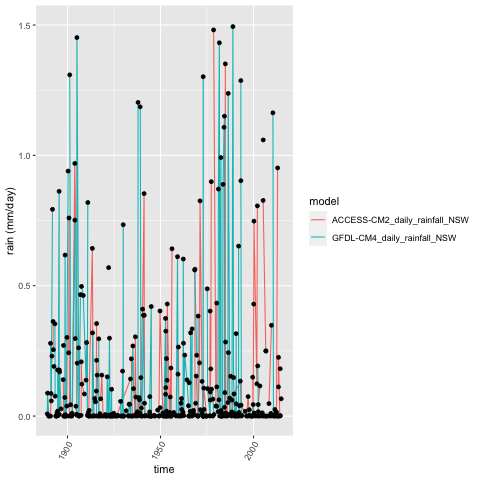

In [42]:
%%R

library(ggplot2)

df_2014 <- sam %>% filter(time == 2014)

p <- ggplot(sam, aes(x=time, y=`rain (mm/day)`)) +
    geom_line(aes(color = model)) + 
    geom_point() +
    theme(axis.text.x=element_text(angle=60, hjust=1)) +
    ylim(0,1.5)

p